# Creating figure 2
This notebook generates figure 2 in the paper, assuming that the  datafiles have been created (by the scripts in the 'simulations'-folder). The figures were put together in inkscape

In [1]:
import sys

import h5py
from fenics import *
from analysistools import *
plt.rc('text', usetex=True)

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

%matplotlib notebook
import logging
ffc_logger = logging.getLogger('FFC')
ffc_logger.setLevel(logging.WARNING)

In [2]:
a = AnalysisTools('fig_2_data/knp_long_with_ca_low_res_ecsfrac_2.h5')

In [3]:
xmin = a.mesh.coordinates()[:,0].min()
xmax = a.mesh.coordinates()[:,0].max()
xlen = xmax - xmin

ymin = a.mesh.coordinates()[:,1].min()
ymax = a.mesh.coordinates()[:,1].max()
ylen = ymax - ymin

zmin = a.mesh.coordinates()[:,2].min()
zmax = a.mesh.coordinates()[:,2].max()
zmid = (zmax + zmin)/2

N = 100
padding = 0.01

In [16]:
x_array = np.linspace(xmin + padding*xlen, xmax - padding*xlen, N)
y_array = np.linspace(ymin + padding*ylen, ymax - padding*ylen, N)
X,Y = np.meshgrid (x_array,y_array)

X=X*1e6
Y = Y*1e6
t_idx = 500

zm = zmid

In [17]:
Z_diff = np.zeros([N,N])

ion_idx = 4

k = t_idx
u = Function(a.W)
c = Function(a.V)
a.hdf.read(u, '/solution/vector_'+str(k))
c.assign(project(u.sub(ion_idx), a.V))
for i,x in enumerate(x_array):
    for j,y in enumerate(y_array):
        p = Point(x,y,zm)
        Z_diff[j,i] = c(p)

<IPython.core.display.Javascript object>


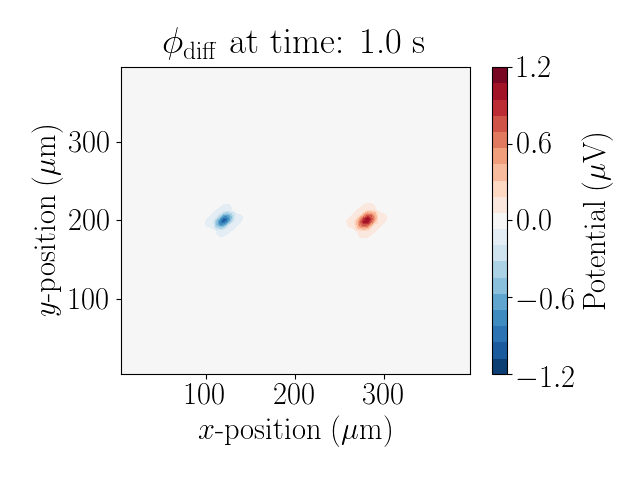

In [18]:
plt.figure()
# print(X.shape, Y.shape, Z[:,:].shape)
levels = np.linspace(-1.2, 1.2, 20)
plt.contourf(X,Y,1e6*(Z_diff), levels=levels, cmap='RdBu_r')
# plt.axis('image')
cbar = plt.colorbar(ticks=[-1.2, -0.6, 0, 0.6, 1.2])
cbar.set_label(r'Potential ($\mu$V)')
plt.xlabel(r'$x$-position ($\mu$m)')
plt.ylabel(r'$y$-position ($\mu$m)')
plt.title(r'$\phi_{\mathrm{diff}}$ at time: ' + str(a.time_series[t_idx]) + " s")
plt.tight_layout()
plt.savefig('phi_diff.pdf')
plt.show()

In [19]:
Z_vc = np.zeros([N,N])

ion_idx = 5

k = t_idx
u = Function(a.W)
c = Function(a.V)
a.hdf.read(u, '/solution/vector_'+str(k))
c.assign(project(u.sub(ion_idx), a.V))
for i,x in enumerate(x_array):
    for j,y in enumerate(y_array):
        p = Point(x,y,zm)
        Z_vc[j,i] = c(p)
        

<IPython.core.display.Javascript object>


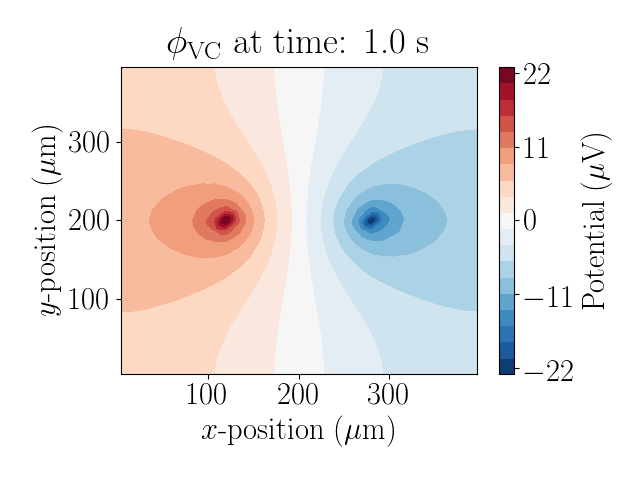

In [20]:
plt.figure()
# print(X.shape, Y.shape, Z[:,:].shape)
levels = np.linspace(-23, 23, 20)
plt.contourf(X,Y,1e6*(Z_vc), levels=levels, cmap='RdBu_r')
# plt.axis('image')
cbar = plt.colorbar(ticks=[-22, -11, 0, 11, 22])
cbar.set_label(r'Potential ($\mu$V)')
plt.xlabel(r'$x$-position ($\mu$m)')
plt.ylabel(r'$y$-position ($\mu$m)')
plt.title(r'$\phi_{\mathrm{VC}}$ at time: ' + str(a.time_series[t_idx]) + " s")
plt.tight_layout()
plt.savefig('phi_vc.pdf')
plt.show()

-22.3271425753
-23.3828904023
-1.05509219912
22.3256355665
23.3807277657
1.05574782704


<IPython.core.display.Javascript object>


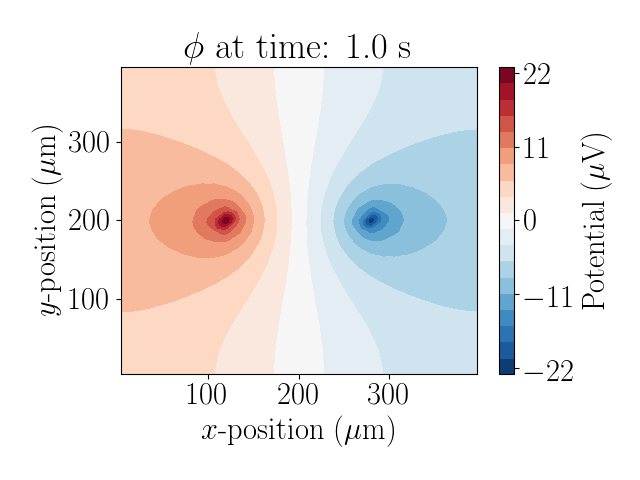

In [21]:
Z = Z_vc+Z_diff
print np.min(Z*1e6)
print np.min(Z_vc*1e6)
print np.min(Z_diff*1e6)

print np.max(Z*1e6)
print np.max(Z_vc*1e6)
print np.max(Z_diff*1e6)

plt.figure()
# print(X.shape, Y.shape, Z[:,:].shape)
levels = np.linspace(-23, 23, 20)
plt.contourf(X,Y,1e6*(Z_vc+Z_diff), levels=levels, cmap='RdBu_r')
# plt.axis('image')
cbar = plt.colorbar(ticks=[-22, -11, 0, 11, 22])
cbar.set_label(r'Potential ($\mu$V)')
plt.xlabel(r'$x$-position ($\mu$m)')
plt.ylabel(r'$y$-position ($\mu$m)')
plt.title(r'$\phi$ at time: ' + str(a.time_series[t_idx]) + " s")
plt.tight_layout()
plt.savefig('phi.pdf')
plt.show()

In [22]:
# p1 = Point(50e-6, 100e-6, 10e-6)
# p2 = Point(150e-6, 100e-6, 10e-6)

p1 = Point(120e-6, 200e-6, 10e-6)
p2 = Point(280e-6, 200e-6, 10e-6)

In [23]:
phi_knp_membcurr_list = []
phi_knp_diff_list = []
u_knp = Function(a.W)
phi_knp = Function(a.V)
nStep = 1
for i in range(0,len(a.time_series),nStep): 
    if(i%10 == 0):
        print(i)
    a.hdf.read(u_knp, '/solution/vector_'+str(i))
    phi_knp.assign(project(u_knp.sub(a.N+1), a.V))
    phi_knp_membcurr_list.append(phi_knp(p1) - phi_knp(p2))
    phi_knp.assign(project(u_knp.sub(a.N), a.V))
    phi_knp_diff_list.append(phi_knp(p1) - phi_knp(p2))

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000


<IPython.core.display.Javascript object>


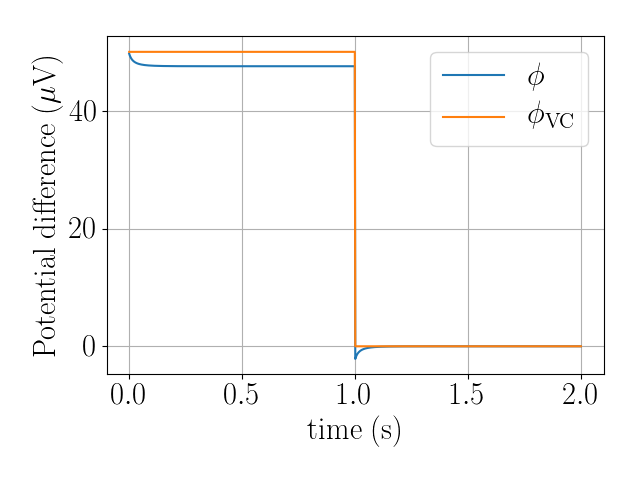

In [25]:
phi_diff = 1e6*(np.array(phi_knp_diff_list))
phi_vc = 1e6*np.array(phi_knp_membcurr_list)

phi = phi_diff + phi_vc
plt.figure()
plt.plot(a.time_series[1:],phi[1:], label=r'$\phi$')
plt.plot(a.time_series[1:],phi_vc[1:], label=r'$\phi_\mathrm{VC}$')
plt.xlabel(r"time (s)")
plt.ylabel(r"Potential difference ($\mu$V)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('phi_time.pdf')
plt.show()